In [3]:
#hide
from utils import *
hc(
    "Detecting Art Forgeries with Differential Equation",
    ["differential equation", "radioactivity",]
)
toc(
    [
        "References",
        "Problem statement",
        "Radioactivity",
    ],
    1
)

## References

1. [Differential Equations and Their Applications: Section-1.3](https://elhacker.info/manuales/springer/1993_Differential%20Equations%20and%20Their%20Applications.pdf)
2. [Han van Meegeren](https://en.wikipedia.org/wiki/Han_van_Meegeren)

## Problem Statement

**The Van Meegeren art forgeries**

<figure>
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6a/VanMeegeren1945_%28cropped%29.jpg/250px-VanMeegeren1945_%28cropped%29.jpg" width="200">
  <figcaption>Courtesy: Wikipedia</figcaption>
</figure>

After the liberation of Belgium and the Netherlands from Nazi Germany at the end of World War II in 1945, the allies began investigating **collaborators** (people who helped the Nazis in some ways, such as by selling them valuable art).**Han van Meegeren** (1889–1947), a Dutch painter was accused of selling artworks of Vermeer, Rembrandt, and de Hooch that were considered Dutch cultural heritage. After his arrest, he claimed that the paintings he had sold were forgeries, but nobody believed him. However, the dating of the paintings later proved his claim by showing that they were not as old as the originals. The dating process relies on the phenomenon of radioactivity, which uses differential equations as its mathematical framework.

## Radioactivity

Around the late 1890s, Rutherford and his collegues showed that atoms of certain radioactive elements are unstable and decay into atoms of another elements. They found that the rate of decay at a given time $t$ is proportional to the number of atoms present at the time $t$.

Mathematically,

#### $\frac{dN}{dt} = -\lambda N$

where, \
$N$: Number of atoms at time $t$ \
$\lambda$: Decay constant (Property of the radioactive element)

## Solution to the equation

### Analytical solution

$N(t) = N_0 e^{-\lambda t}$

where, \
$N_0$: Number of atoms at $t=0$


### Numerical solution

Numerically, $\frac{dN}{dt} \approx \frac{N(t+\Delta{t}) - N(t)}{\Delta{t}}$

$\therefore \frac{dN}{dt} = -\lambda N \implies \frac{N(t+\Delta{t}) - N(t)}{\Delta{t}} = -\lambda N(t)$

$\implies N(t+\Delta{t}) = N(t) - \lambda N(t) \Delta{t}$

$\implies N(t+\Delta{t}) = N(t) + \frac{dN}{dt} \Delta{t}$

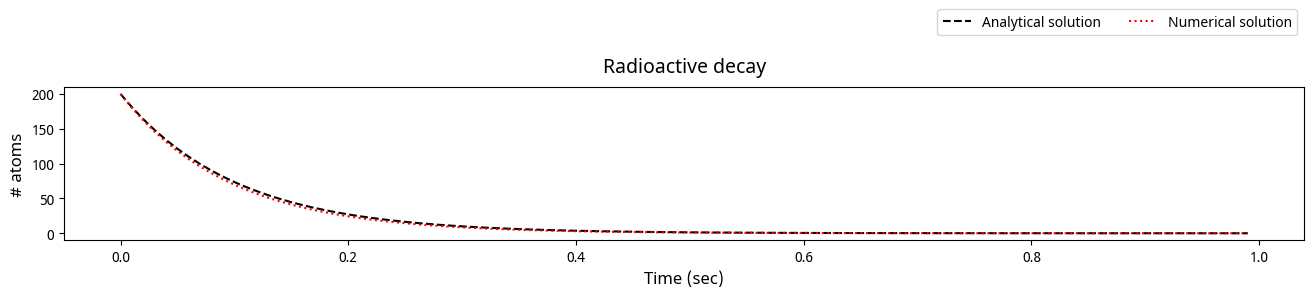

In [2]:
import modusa as ms
import numpy as np

dt = 0.01 # sec
lam = 10
N0 = 200 # Number of atoms at t = 0 sec

dur = 1 # Observing the decay for 1 sec
t = np.arange(0, dur, dt)

# Analytical solution
N_anal = N0 * np.exp(-lam * t)

# Numerical solution
N_num = np.zeros(t.size)
N_num[0] = N0

for i in range(1, N_num.size):
    # The decay rate at this moment
    dN_dt = -lam * N_num[i-1]
    N_num[i] = N_num[i-1] + dN_dt * dt

fig = ms.fig1d()
fig.add_signal(N_anal, t, c="k", ls="--", label="Analytical solution")
fig.add_signal(N_num, t, c="r", ls=":", label="Numerical solution")
fig.add_meta_info("Radioactive decay", "# atoms", "Time (sec)")
fig.add_legend()

We see that the numerical solultion approximates the analytical solution.